┌ Warning: `DataFrame(columns::AbstractMatrix)` is deprecated, use `DataFrame(columns, :auto)` instead.
│   caller = #generate#1(::Int64, ::Function, ::Main.Ntl.Models.Changepoint{Main.Ntl.Models.NtlParameters{Main.Ntl.Models.PoissonArrivals},Main.Ntl.Models.GaussianParameters}) at synthetic.jl:231
└ @ Main.Ntl.Generate /Users/seanla/Projects/ntl-stick-breaking-julia/src/synthetic.jl:231
┌ Warning: `DataFrame(columns::AbstractMatrix)` is deprecated, use `DataFrame(columns, :auto)` instead.
│   caller = #generate#1(::Int64, ::Function, ::Main.Ntl.Models.Changepoint{Main.Ntl.Models.NtlParameters{Main.Ntl.Models.PoissonArrivals},Main.Ntl.Models.GaussianParameters}) at synthetic.jl:233
└ @ Main.Ntl.Generate /Users/seanla/Projects/ntl-stick-breaking-julia/src/synthetic.jl:233


100.0%┣██████████████████████████████████████████┫ 1/1 [00:00<Inf:Inf, 0.0 it/s]


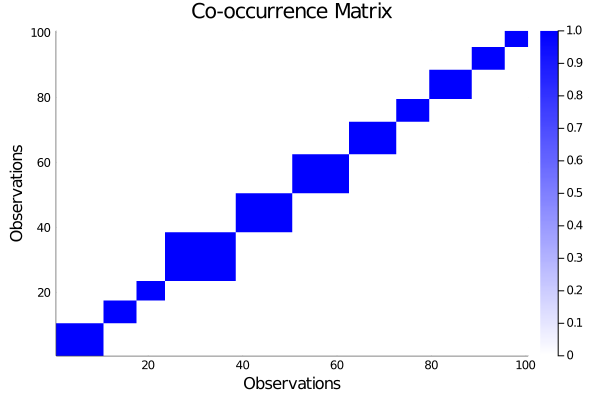

In [1]:
include("../ntl.jl")
import Random

using LinearAlgebra
Random.seed!(1)
data_covariance = Matrix{Float64}(0.1I, 2, 2)
prior_covariance = Matrix{Float64}(I, 2, 2)
prior_mean = Vector{Float64}(zeros(2))
data_parameters = Ntl.Models.GaussianParameters(data_covariance, prior_mean, prior_covariance)

psi_prior = Vector{Float64}([1, 1])
phi_prior = Vector{Float64}([1, 1])
arrival = Ntl.Models.PoissonArrivals(8, 1)
ntl_cluster_parameters = Ntl.Models.NtlParameters(psi_prior, arrival)

changepoint_model = Ntl.Models.Changepoint(ntl_cluster_parameters, data_parameters)

changepoint = Ntl.Generate.generate(changepoint_model, n=100)
data = Matrix(transpose(changepoint[:, 2:end]))
true_changepoints = changepoint[:, 1]
Ntl.Plot.plot_assignments(true_changepoints)
Ntl.Plot.plot_co_occurrence_matrix(true_changepoints)

In [2]:
gibbs_sampler = Ntl.Samplers.GibbsSampler(num_iterations=1000)
(results, log_likelihoods) = Ntl.Fitter.fit(data, changepoint_model, gibbs_sampler)
Ntl.Plot.plot_co_occurrence_matrix(results)

MethodError: MethodError: no method matching random_initial_assignment!(::Array{Int64,2}, ::Array{Float64,2}, ::Main.Ntl.Models.SufficientStatistics{Main.Ntl.Models.ChangepointSufficientStatistics,Main.Ntl.Models.GaussianSufficientStatistics}, ::Main.Ntl.Models.Changepoint{Main.Ntl.Models.NtlParameters{Main.Ntl.Models.PoissonArrivals},Main.Ntl.Models.GaussianParameters}, ::Main.Ntl.Models.AuxillaryVariables{Main.Ntl.Models.PoissonAuxillaryVariables,Main.Ntl.Models.GaussianAuxillaryVariables})
Closest candidates are:
  random_initial_assignment!(::Any, ::Any, ::Any, !Matched::Union{HiddenMarkovModel, Mixture}, ::Any) at /Users/seanla/Projects/ntl-stick-breaking-julia/src/fit.jl:36
  random_initial_assignment!(::Any, ::Any, ::Any, ::Main.Ntl.Models.Changepoint) at /Users/seanla/Projects/ntl-stick-breaking-julia/src/fit.jl:53

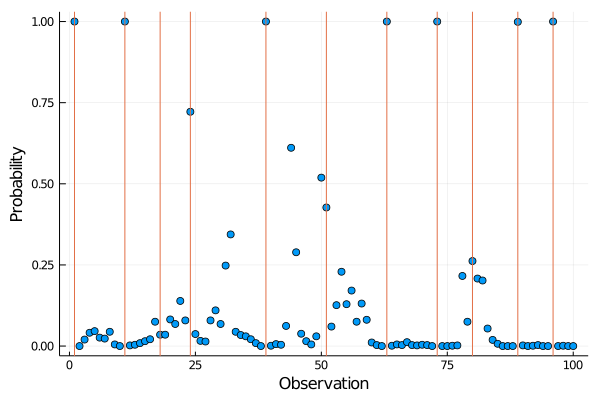

In [ ]:
Ntl.Plot.plot_arrival_posterior_probabilities(results, true_changepoints)

100.0%┣█████████████████████████████████┫ 10000/10000 [00:05<00:00, 1930.6 it/s]
100.0%┣█████████████████████████████████┫ 10000/10000 [00:05<00:00, 2142.7 it/s]


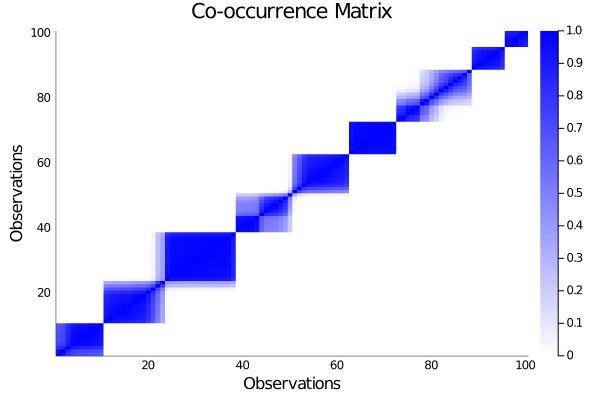

In [ ]:
gibbs_sampler = Ntl.Samplers.GibbsSampler(num_iterations=10000)
dp_parameters = Ntl.Models.DpParameters(1, 1)
dp_changepoint_model = Ntl.Models.Changepoint(dp_parameters, data_parameters)
(dp_results, log_likelihoods) = Ntl.Fitter.fit(data, dp_changepoint_model, gibbs_sampler)
Ntl.Plot.plot_co_occurrence_matrix(dp_results)

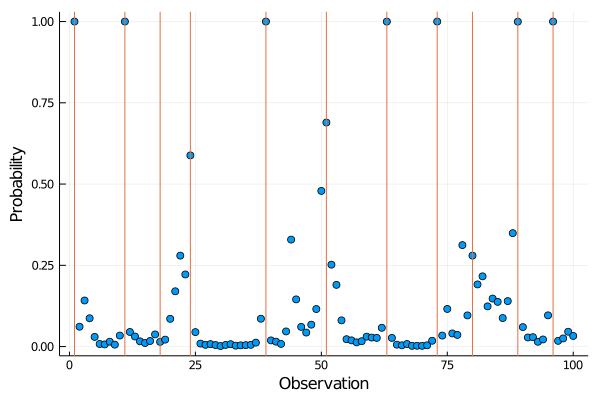

In [ ]:
Ntl.Plot.plot_arrival_posterior_probabilities(dp_results, true_changepoints)